In [38]:
import glob
import cv2
import os
import sys
import numpy as np
import random
import itertools
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime
# from matplotlib import cm

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300

def visualize(original, augmented, edged):
    
    fig = plt.figure()
    plt.subplot(1,3,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,3,2)
    plt.title('Filtered image')
    plt.imshow(augmented)

    plt.subplot(1,3,3)
    plt.title('Edge Detect image')
    plt.imshow(edged)
    plt.show()

out0 = out1 = out2 = out3 = out4 = out5 = out6 = out7 = outNone = 0
#number_carlefts = []
#number_carrights = []
images = []
labels = []
Datasetlabels = []
img_basenames = []

INPUT1 = r"/tf/train_py/images_split"
INPUT2 = r"/tf/train_py/images_split_15"
INPUT3 = r"/tf/train_py/images_split_30"
INPUT4 = r"/tf/train_py/images_split_45"
INPUT5 = r"/tf/train_py/images_split_test" # Excluded since its designed for test reasons
INPUT6 = r"/tf/train_py/images_split_val"
INPUT7 = r"/tf/train_py/images_synth"

INPUTS = [INPUT1, INPUT2, INPUT3, INPUT4, INPUT5, INPUT6, INPUT7] #all
# INPUTS = [INPUT1, INPUT2, INPUT3, INPUT4]                         #training
# INPUTS = [INPUT1, INPUT2, INPUT3, INPUT4, INPUT7]                 #training + synth
# INPUTS = [INPUT5]                                                 #test
# INPUTS = [INPUT6]                                                 #val
# INPUTS = [INPUT7]                                                 #synth

#reading in pictures
img_paths = []
for input in INPUTS:
    for file in glob.glob(f"{input}{os.sep}*.png"):
        img_paths.append(file)
print("Image number: ", len(img_paths))

for img_path in img_paths:
    img_name = os.path.basename(img_path)
    y1 = img_name.split('_')[0]
    y2 = img_name.split('_')[1]
    y3 = img_name.split('_')[2]
    y4 = img_name.split('_')[3]
    y5 = img_name.split('_')[4]
    y6 = img_name.split('_')[5]
    slice_number = img_name.split('_')[6]
    img_basename = img_name.split(f"{y1}_{y2}_{y3}_{y4}_{y5}_{y6}_{slice_number}_")[1]
    img_basename = img_basename.split('.')[0]
#     print(y1, y2, y3, y4, y5, y6, slice_number, img_basename)
    
    number_carlefts = (int(y1) + int(y2) + int(y3))
    number_carrights = (int(y4) + int(y5) + int(y6))
    
    Datasetlabel = [int(y1), int(y2), int(y3), int(y4), int(y5), int(y6)]
    Datasetlabels.append(Datasetlabel)

    img = cv2.imread((img_path), 0)
    #visualize(img, img)
    #print(number_carlefts, "\t", number_carrights)
    images.append(img)
    label = [int(y1), int(y2), int(y3), int(y4), int(y5), int(y6)]
    labels.append(label)
print("Image number: ", len(images), "Labels number: ", len(labels))

Image number:  11900
Image number:  11900 Labels number:  11900


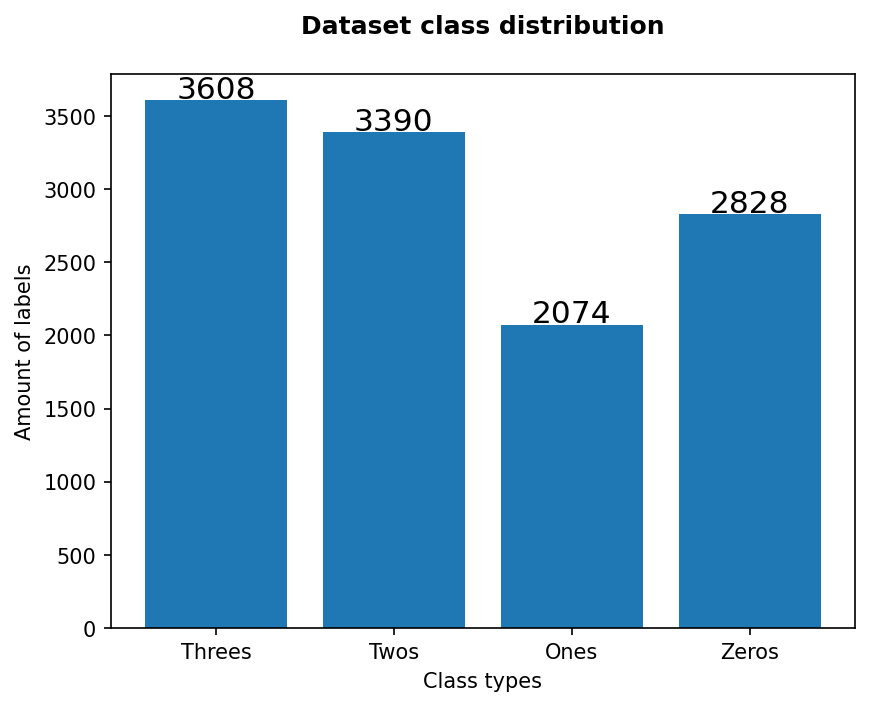

In [39]:
# Plotting label distribution
Lthrees = Ltwos = Lones = Lzeros = 0
Ltypes = ["Threes", "Twos", "Ones", "Zeros"]
for label in Datasetlabels: # 0 1 2 3 4
    Lsumleft = np.sum(np.array(label[0:3]))
    Lsumright = np.sum(np.array(label[3:6]))
    if (Lsumleft or Lsumright) == 3:
            Lthrees+=1
    if (Lsumleft or Lsumright) == 2:
            Ltwos+=1
    if (Lsumleft or Lsumright) == 1:
            Lones+=1
    if (Lsumleft or Lsumright) == 0:
            Lzeros+=1
Ltypevals = [Lthrees, Ltwos, Lones, Lzeros]
plt.clf()
plots = plt.bar(Ltypes, Ltypevals)
plt.xlabel('Class types')
plt.ylabel('Amount of labels')
plt.title('Dataset class distribution\n', fontweight ="bold")

# for i,j in enumerate(Ltypevals):
for bar in plots.patches:

    plt.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=15, xytext=(0, 5),
        textcoords='offset points')
                

plt.show()